In [1]:
# region Imports

print("Loading libraries...")

#* --------------------------------------------------------------------------------
#* General purpose imports
#* --------------------------------------------------------------------------------
import pandas as pd
import numpy as np
from astroquery.sdss import SDSS

from scipy.stats import multivariate_normal
import scipy.interpolate as interp

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines  # for legend proxies
import matplotlib.ticker as ticker

import seaborn as sns

import time 
import re 
from io import StringIO


#* --------------------------------------------------------------------------------
#* Personal librairies imports
#* --------------------------------------------------------------------------------
import sys, os
src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)
from utils import astro_utils as au
from utils import maths_utils  as mu
from utils import stats_utils  as su
from utils import graphics_utils  as gu
from utils import labels_utils  as lu

#* --------------------------------------------------------------------------------
#* Global variables
#* --------------------------------------------------------------------------------
import config as co

#* --------------------------------------------------------------------------------
#* Project functions imports
#* --------------------------------------------------------------------------------
import data_loader as dl
import plots



print("Done")

# endregion


Loading libraries...
Done


In [2]:
Control = dl.load_SDSS()

Querying the SDSS database...
78711 galaxies retrieved.
NB: physical parameters come from MPA-JHU spectroscopic catalogue


In [3]:
name = 'gal_in_CG_new.dat'
nb=4
vlim=5

df = dl.read_CG_file(co.CG_PATH, f"{name}-{nb}-dv{vlim}")

   1888 galaxies read from gal_in_CG_new.dat-4-dv5
      3.6e-03 <= z <= 1.2e-01
      10.59 <= r <= 17.69


In [4]:
test = intersect_and_enrich(df, Control)

NameError: name 'intersect_and_enrich' is not defined

(1888, 78711, 1248, 0.6610169491525424)

In [ ]:
Control_select = Control.loc[Control['objID'].isin(df['objid'])]

In [ ]:
Control_select.shape[0]

1504

In [ ]:
df_full = pd.merge(df, Control_select, left_on='objid', right_on='objID')

In [ ]:
merged = pd.merge(df, Control_select, left_on='objid', right_on='objID', how='inner')

In [ ]:
len(merged)

3007

In [ ]:
merged['objid'].drop_duplicates().shape[0]

1248

In [ ]:
df['objid'].drop_duplicates().shape[0]

1888

In [ ]:
Control['objID'].drop_duplicates().shape[0]

78703

In [ ]:
df['objid'].value_counts().value_counts()

count
1    1888
Name: count, dtype: int64

In [ ]:
Control['objID'].value_counts().value_counts()

count
1    78695
2        8
Name: count, dtype: int64

In [ ]:
merged['objid'].value_counts().value_counts()

count
2     425
1     398
3     203
4     119
5      46
6      27
9      10
7       9
10      6
15      2
14      2
11      1
Name: count, dtype: int64

In [ ]:
merged['objid'].value_counts()

objid
1237665531723317728    15
1237665531723317688    15
1237667444048658523    14
1237667444048658526    14
1237658612519076024    11
                       ..
1237662269148561840     1
1237662269148561510     1
1237662269148561505     1
1237667293727817750     1
1237662501081055264     1
Name: count, Length: 1248, dtype: int64

In [ ]:
merged.loc[merged['objid'] == 1237665531723317728]

,idcg,ra_deg,dec_deg,r_obs,zcmb,iline,g_obs,objid,specObjID,z,...,h_beta_eqw,oiii_5007_eqw,nii_6584_eqw,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,log_NII_Ha,log_OIII_Hb,is_AGN
2525,383,240.534851,16.342224,15.418411,0.039895,458645,16.234771,1237665531723317728,2473718153453004800,0.034094,...,1.375484,1.311920,-0.361447,3.094706,2.579112,-5.965526,1.249414,-0.393913,NaN,False
2526,383,240.534851,16.342224,15.418411,0.039895,458645,16.234771,1237665531723317728,2473723101255329792,0.038128,...,-0.691046,-0.617651,0.152454,1.952137,1.827327,-1.336068,1.307843,-0.173955,NaN,False
2527,383,240.534851,16.342224,15.418411,0.039895,458645,16.234771,1237665531723317728,2473721177109981184,0.038609,...,-0.352914,-0.182340,-0.119938,34.821480,16.590700,12.764340,7.275177,-0.680004,-0.113866,False
2528,383,240.534851,16.342224,15.418411,0.039895,458645,16.234771,1237665531723317728,2472523808595011584,0.037829,...,-0.334509,0.085684,-0.232305,8.047643,5.642409,-3.636631,8.282437,0.012489,NaN,False
2529,383,240.534851,16.342224,15.418411,0.039895,458645,16.234771,1237665531723317728,2472518036158965760,0.042958,...,-0.206008,0.454531,-0.323877,5.887399,2.845570,-2.316628,3.153932,-0.271071,NaN,False
2530,383,240.534851,16.342224,15.418411,0.039895,458645,16.234771,1237665531723317728,2473721451987888128,0.034326,...,-0.201061,0.054276,-0.092900,6.653059,4.365282,-3.916687,-0.015039,NaN,NaN,False
2531,383,240.534851,16.342224,15.418411,0.039895,458645,16.234771,1237665531723317728,2473676646889056256,0.037398,...,-0.406061,0.157315,-0.215316,13.515870,11.089620,-11.338710,13.604740,0.002846,NaN,False
2532,383,240.534851,16.342224,15.418411,0.039895,458645,16.234771,1237665531723317728,2473678571034404864,0.035311,...,-0.954173,-1.293385,-3.013826,190.404500,45.426440,52.136900,147.824500,-0.109931,0.059837,True
2533,383,240.534851,16.342224,15.418411,0.039895,458645,16.234771,1237665531723317728,2472523258839197696,0.039499,...,0.391083,0.410072,-0.256900,-2.376334,-5.620284,-2.634981,2.320807,NaN,NaN,False
2534,383,240.534851,16.342224,15.418411,0.039895,458645,16.234771,1237665531723317728,2473719802720446464,0.042728,...,-0.081678,-0.798420,0.051242,4.496293,-0.255536,-0.589246,2.572865,-0.242438,NaN,False


In [ ]:
merged.loc[~merged['objid'].isin(df['objid'])]

,idcg,ra_deg,dec_deg,r_obs,zcmb,iline,g_obs,objid,specObjID,z,...,h_beta_eqw,oiii_5007_eqw,nii_6584_eqw,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,log_NII_Ha,log_OIII_Hb,is_AGN


In [ ]:
merged.loc[~merged['objid'].isin(df['objid'])]

In [ ]:
CG = dl.import_CG(Control)

Importing CG galaxies
   5228 galaxies read from gal_in_CG_new.dat-3-dv1
      3.0e-03 <= z <= 1.3e-01
      9.70 <= r <= 17.72
   Intersecting CG and Control galaxies
   7708 galaxies left after cuts (z between 0.005 and 0.0452, R < 17.77)


   4878 galaxies read from gal_in_CG_new.dat-3-dv5
      3.0e-03 <= z <= 1.2e-01
      9.70 <= r <= 17.72
   Intersecting CG and Control galaxies
   7518 galaxies left after cuts (z between 0.005 and 0.0452, R < 17.77)


   2242 galaxies read from gal_in_CG_new.dat-4-dv1
      3.6e-03 <= z <= 1.3e-01
      10.59 <= r <= 17.69
   Intersecting CG and Control galaxies
   3388 galaxies left after cuts (z between 0.005 and 0.0452, R < 17.77)


   1888 galaxies read from gal_in_CG_new.dat-4-dv5
      3.6e-03 <= z <= 1.2e-01
      10.59 <= r <= 17.69
   Intersecting CG and Control galaxies
   3014 galaxies left after cuts (z between 0.005 and 0.0452, R < 17.77)


Done


In [ ]:
CG['3_1000']

,idcg,ra_deg,dec_deg,r_obs,zcmb,iline,g_obs,objid,specObjID,z,...,h_beta_eqw,oiii_5007_eqw,nii_6584_eqw,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,log_NII_Ha,log_OIII_Hb,is_AGN
0,2,218.524375,0.620088,13.177611,0.031181,1853,14.029404,1237648705129349140,345745857301211136,0.031603,...,0.770517,-0.037270,0.174170,2.921328,0.763200,-0.508588,-2.299509,NaN,NaN,False
1,2,218.524375,0.620088,13.177611,0.031181,1853,14.029404,1237648705129349140,344688126679083008,0.029922,...,-0.246466,-0.401361,-1.029665,48.226500,13.206880,8.396994,28.040860,-0.235494,-0.196676,True
2,2,218.524375,0.620088,13.177611,0.031181,1853,14.029404,1237648705129349140,344688951312803840,0.030401,...,-0.293759,-0.294322,-0.161900,87.648310,45.849280,27.176640,5.299552,-1.218504,-0.227137,False
3,2,218.546907,0.615753,15.371264,0.030701,1854,16.187483,1237648705129349141,345745857301211136,0.031603,...,0.770517,-0.037270,0.174170,2.921328,0.763200,-0.508588,-2.299509,NaN,NaN,False
4,2,218.546907,0.615753,15.371264,0.030701,1854,16.187483,1237648705129349141,344688126679083008,0.029922,...,-0.246466,-0.401361,-1.029665,48.226500,13.206880,8.396994,28.040860,-0.235494,-0.196676,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7703,1582,121.681175,19.807375,14.939662,0.038210,59706,15.825695,1237674371289907217,2164139930387769344,0.037463,...,-1.957034,-0.862762,-6.796892,341.953700,40.047760,22.435530,224.137100,-0.183454,-0.251642,True
7704,1582,121.776742,19.859610,15.976226,0.039705,59629,16.857680,1237673809192222804,2164152574771488768,0.035298,...,0.145732,-0.513453,0.037588,19.678550,-4.446280,25.759920,-10.590630,NaN,NaN,False
7705,1582,121.776742,19.859610,15.976226,0.039705,59629,16.857680,1237673809192222804,2164151750137767936,0.038957,...,-1.511768,-1.263163,-3.105906,87.118370,15.603760,21.706090,47.422870,-0.264122,0.143352,True
7706,1582,121.649520,19.792651,16.311999,0.036292,59705,16.673551,1237674371289841856,2164141854533117952,0.035546,...,-8.137480,-2.560982,-10.770910,313.298100,82.172410,30.459790,92.510980,-0.529764,-0.430999,False


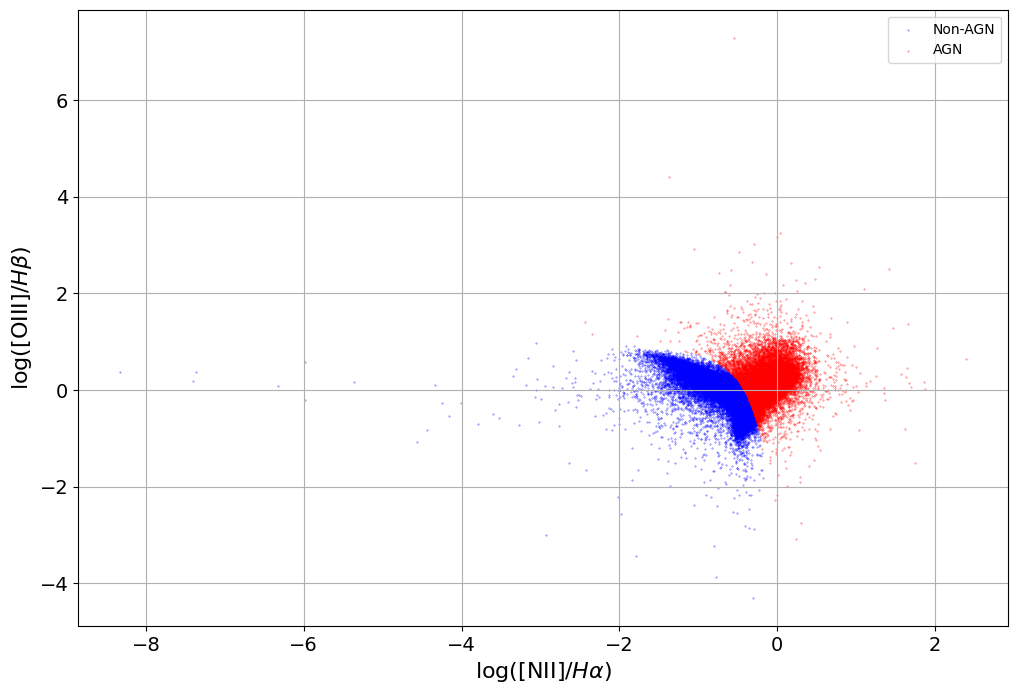

In [ ]:
plots.bpt_diagram(Control)

In [ ]:
#* --------------------------------------------------------------------------------
#* Cleaning the data to exclude AGN and invalid M*
#* --------------------------------------------------------------------------------
sdss = non_agn.copy()
sdss = sdss.dropna(subset=['specsfr_tot_p50', 'lgm_tot_p50'])
sdss = sdss[sdss['lgm_tot_p50'] > 0]
sdss['sSFR_status'] = np.where(sdss['specsfr_tot_p50'] < -1000,'Q','')


#* --------------------------------------------------------------------------------
#* Convert data to NumPy arrays (removed PyTorch usage).
#* Here we keep the raw and optionally normalized versions if needed.
#* --------------------------------------------------------------------------------
non_quenched = sdss.loc[sdss['sSFR_status'] != 'Q']
X = non_quenched[['lgm_tot_p50', 'specsfr_tot_p50']].values

#* Example optional normalization using NumPy:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / (X_std + 1e-8)  #* Add small epsilon to avoid zero div


#* --------------------------------------------------------------------------------
#* Set random seed for reproducibility
#* --------------------------------------------------------------------------------
np.random.seed(42)



#* --------------------------------------------------------------------------------
#* Fit and visualize the GMM on our non-AGN data.
#* --------------------------------------------------------------------------------
start_time = time.time()
fit_results = su.fit_gmm(X)
print(f"Fitting completed in {time.time() - start_time:.2f} seconds")

su.visualize_gmm(X, fit_results) # Possible file name: 'gmm_fitted_galaxy_population.png'

NameError: name 'non_agn' is not defined

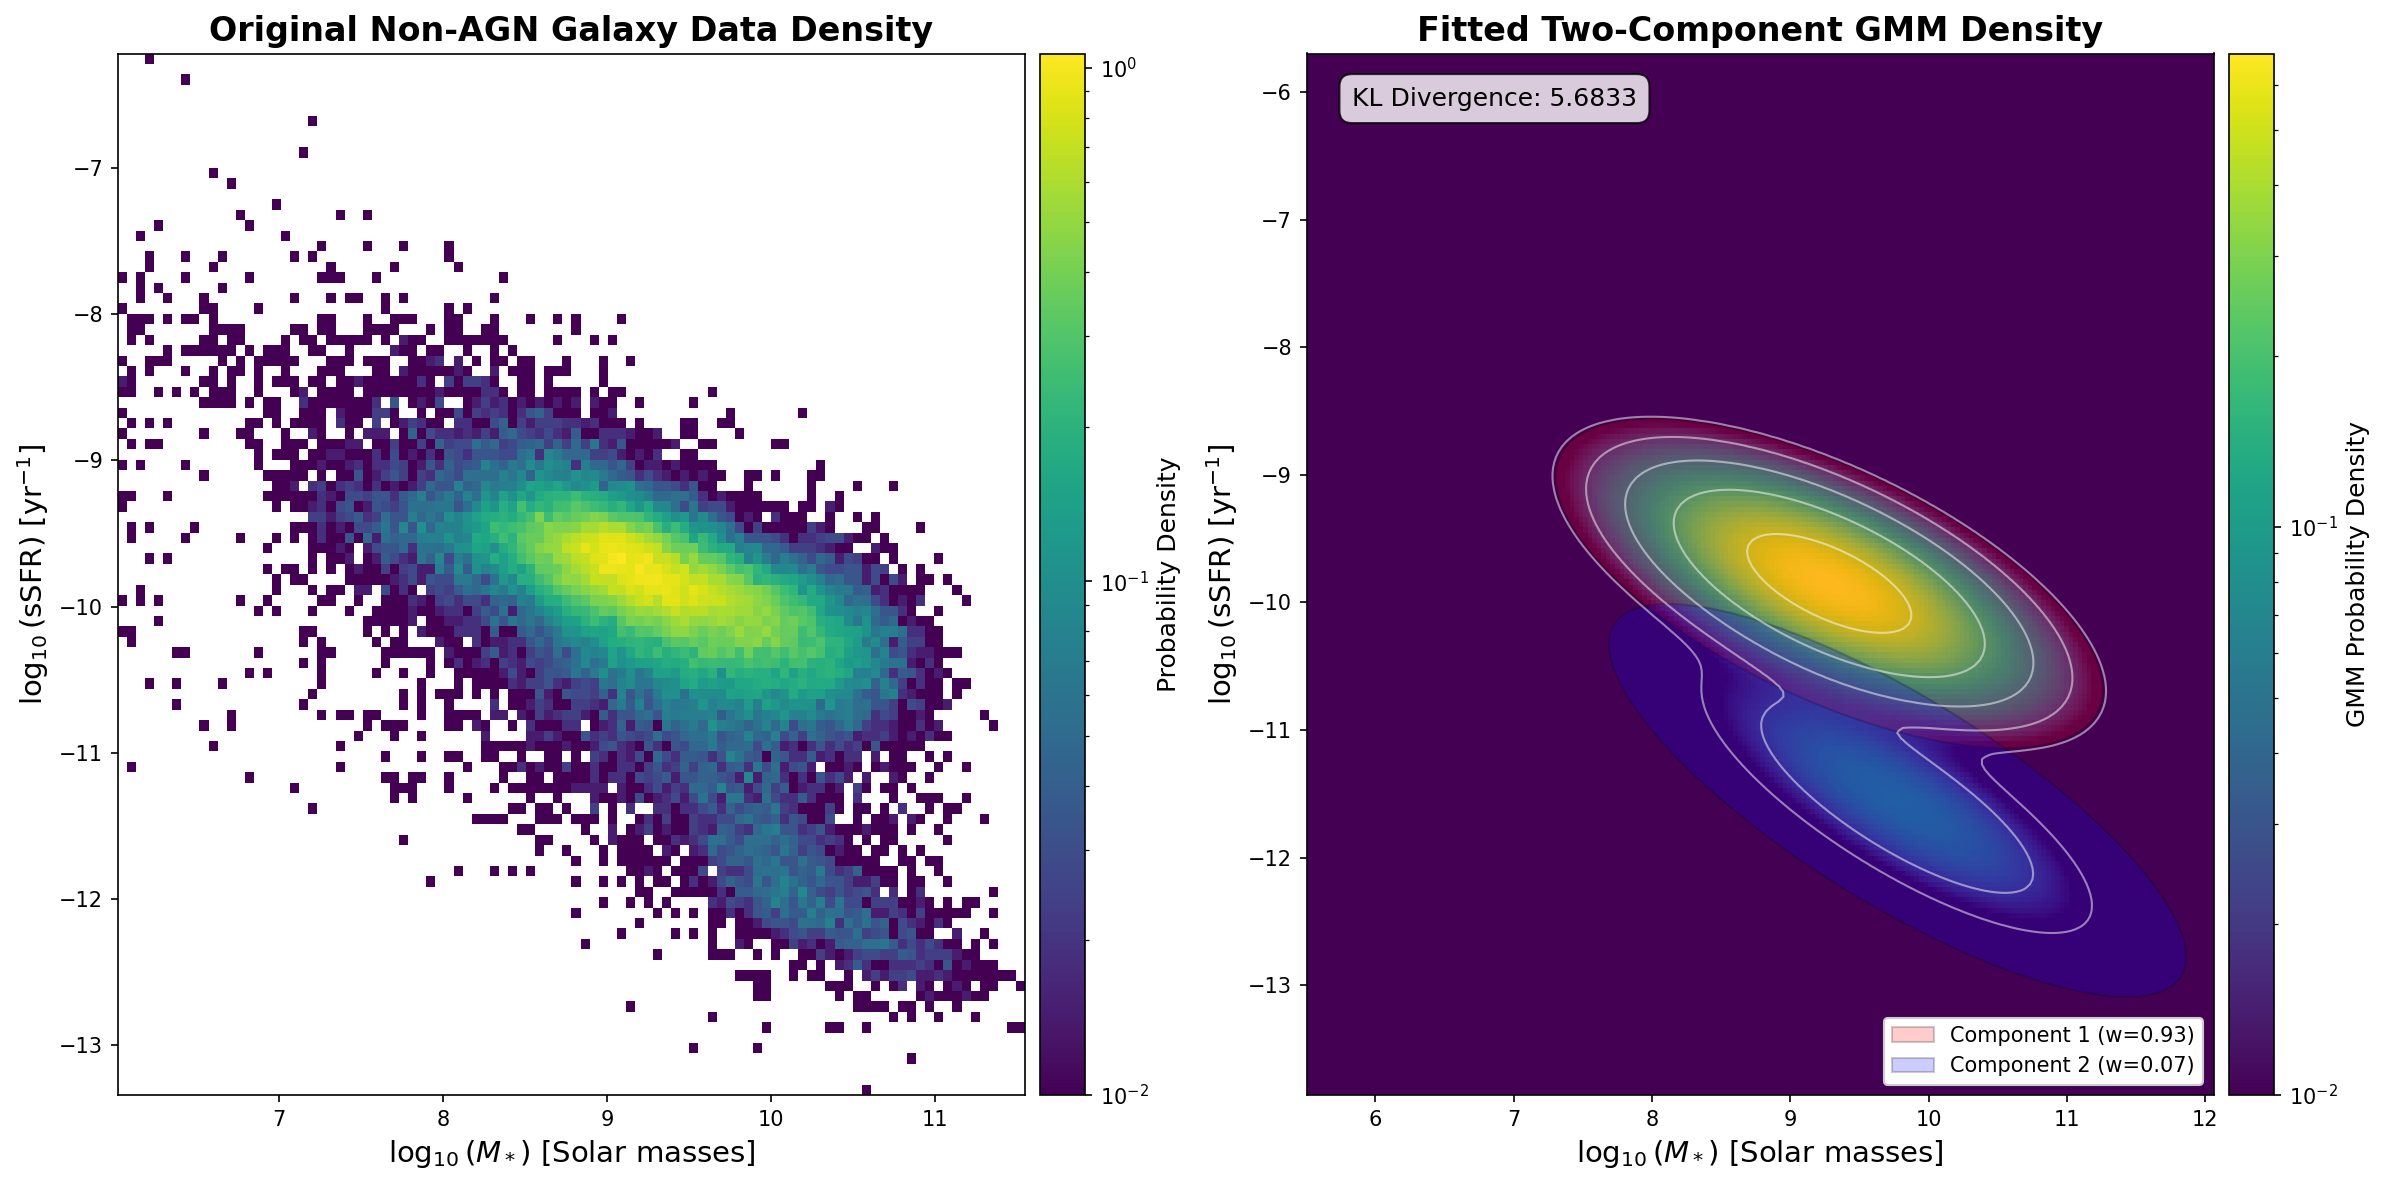

In [ ]:
su.density_original_vs_GMMfit(X, fit_results) # Possible file name: 'density_original_vs_GMMfit.png'

In [ ]:
#* Print a summary of the GMM components
print("\nGalaxy Population Component Summary:")
for i in range(2):
    print(f"Component {i+1}:")
    print(f"  Weight: {fit_results['weights'][i]:.2f}")
    print(f"  Mean Stellar Mass: 10^{fit_results['means'][i][0]:.2f} solar masses")
    print(f"  Mean Specific SFR: 10^{fit_results['means'][i][1]:.2f} yr^-1")
    print(f"  Standard deviations in log-space:")
    print(f"    log(M*): {np.sqrt(fit_results['covs'][i][0,0]):.2f}")
    print(f"    log(sSFR): {np.sqrt(fit_results['covs'][i][1,1]):.2f}")
    corr = (fit_results['covs'][i][0,1] /
            (np.sqrt(fit_results['covs'][i][0,0]*fit_results['covs'][i][1,1])))
    print(f"  Correlation: {corr:.2f}")


Galaxy Population Component Summary:
Component 1:
  Weight: 0.93
  Mean Stellar Mass: 10^9.28 solar masses
  Mean Specific SFR: 10^-9.85 yr^-1
  Standard deviations in log-space:
    log(M*): 0.66
    log(sSFR): 0.43
  Correlation: -0.65
Component 2:
  Weight: 0.07
  Mean Stellar Mass: 10^9.78 solar masses
  Mean Specific SFR: 10^-11.55 yr^-1
  Standard deviations in log-space:
    log(M*): 0.70
    log(sSFR): 0.51
  Correlation: -0.80


In [ ]:
means = fit_results['means']
covs = fit_results['covs']
weights = fit_results['weights']

# Decide which component corresponds to star forming:
# We assume the component with the higher sSFR (index 1) is star forming.
starforming_idx = np.argmax([m[1] for m in means])
nonstar_idx = 1 - starforming_idx

print("Star forming component index:", starforming_idx)
print("Non-star forming component index:", nonstar_idx)

# Compute posterior probabilities for each galaxy in non_quenched.
# non_quenched is the DataFrame with columns 'lgm_tot_p50' and 'specsfr_tot_p50'
X = non_quenched[['lgm_tot_p50', 'specsfr_tot_p50']].values

def compute_component_prob(x, comp_idx):
    return weights[comp_idx] * multivariate_normal.pdf(x, mean=means[comp_idx], cov=covs[comp_idx], allow_singular=True)

star_forming = []
posterior = []

for x in X:
    p_star = compute_component_prob(x, starforming_idx)
    p_nonstar = compute_component_prob(x, nonstar_idx)
    if p_star >= p_nonstar:
        star_forming.append(True)
        posterior.append(p_star / (p_star + p_nonstar))
    else:
        star_forming.append(False)
        posterior.append(p_star / (p_star + p_nonstar))

non_quenched = non_quenched.copy()
non_quenched['is_star_forming'] = star_forming
non_quenched['posterior_star'] = posterior

Star forming component index: 0
Non-star forming component index: 1


In [ ]:
# plot_classification(non_quenched, sdss, fit_results)

In [ ]:
def get_decision_boundary_interp(non_quenched, fit_results, boundary_margin=0.5, grid_points=200):
    """
    Computes an interpolation function f_interp from the decision boundary
    between star-forming and green valley galaxies.
    
    Parameters
    ----------
    non_quenched : pandas.DataFrame
        DataFrame with columns 'lgm_tot_p50' and 'specsfr_tot_p50'.
    fit_results : dict
        Dictionary with keys 'means', 'covs', and 'weights' from the GMM fit.
    boundary_margin : float, optional
        Extra margin to add/subtract when computing the grid limits.
    grid_points : int, optional
        Number of grid points for both x and y directions.
        
    Returns
    -------
    f_interp : function
        Interpolation function f_interp(mass) that returns the limiting sSFR.
    """
    # Extract GMM parameters.
    means = fit_results['means']
    covs = fit_results['covs']
    weights = fit_results['weights']
    
    # Assume the component with the higher sSFR (index 1) is star forming.
    starforming_idx = np.argmax([m[1] for m in means])
    nonstar_idx = 1 - starforming_idx
    
    # Set grid limits.
    x_min = non_quenched['lgm_tot_p50'].min() - boundary_margin
    x_max = non_quenched['lgm_tot_p50'].max() + boundary_margin
    y_min = non_quenched['specsfr_tot_p50'].min() - boundary_margin
    y_max = non_quenched['specsfr_tot_p50'].max() + boundary_margin
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_points),
                         np.linspace(y_min, y_max, grid_points))
    grid_points_arr = np.column_stack([xx.ravel(), yy.ravel()])
    
    p_star_grid = weights[starforming_idx] * multivariate_normal.pdf(
        grid_points_arr, mean=means[starforming_idx], cov=covs[starforming_idx], allow_singular=True)
    p_nonstar_grid = weights[nonstar_idx] * multivariate_normal.pdf(
        grid_points_arr, mean=means[nonstar_idx], cov=covs[nonstar_idx], allow_singular=True)
    pdf_diff = p_star_grid - p_nonstar_grid
    pdf_diff = pdf_diff.reshape(xx.shape)
    
    # Draw the zero contour (decision boundary) offscreen.
    fig_temp = plt.figure()
    contour = plt.contour(xx, yy, pdf_diff, levels=[0], colors='black', linestyles='--', linewidths=2)
    plt.close(fig_temp)
    
    # Extract contour coordinates (use the longest segment).
    segments = contour.allsegs[0]
    if len(segments) == 0:
        raise ValueError("No decision boundary contour found.")
    seg = max(segments, key=lambda s: s.shape[0])
    # Sort the segment by mass (first column)
    seg = seg[seg[:, 0].argsort()]
    
    # Create interpolation function: given a mass, return the limiting sSFR.
    f_interp = interp.interp1d(seg[:, 0], seg[:, 1], bounds_error=False, fill_value="extrapolate")
    return f_interp

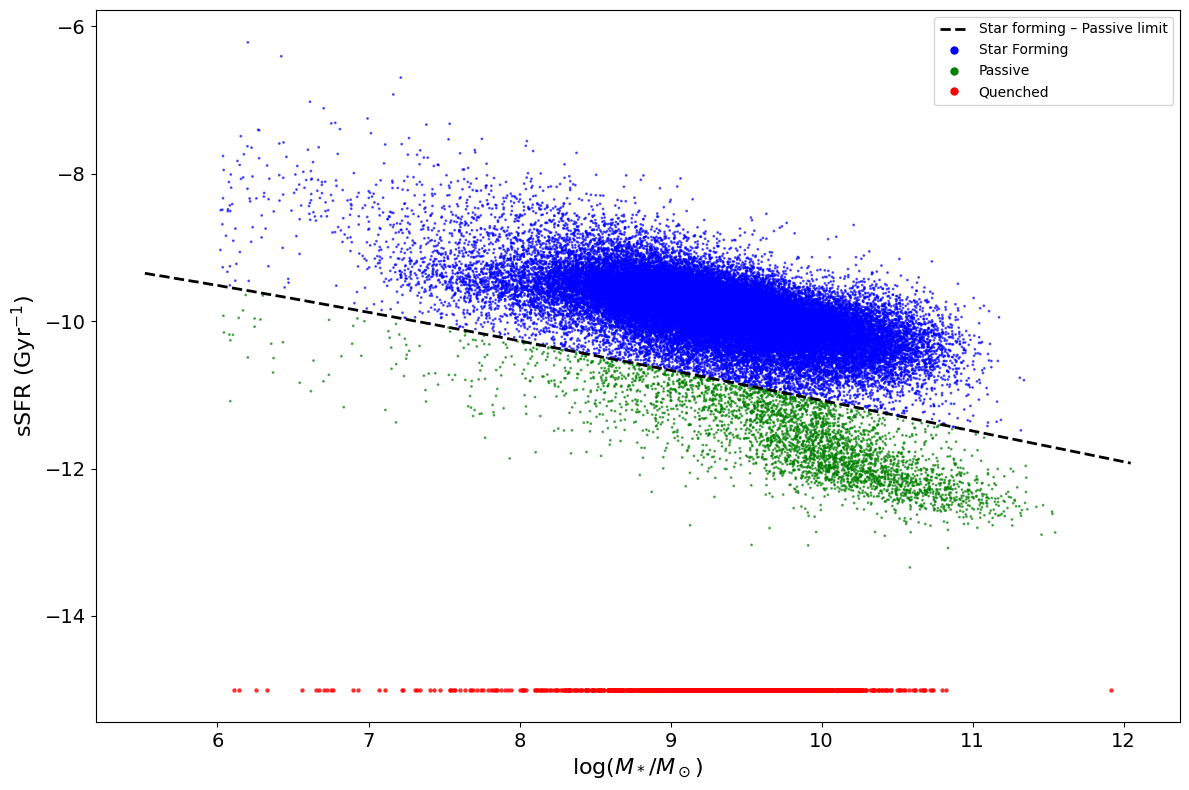

In [ ]:
# Get the interpolation function from the decision boundary.
f_interp = get_decision_boundary_interp(non_quenched, fit_results)

# Now draw the classification figure using f_interp.
plots.classification_figure(non_quenched, sdss, fit_results, f_interp)

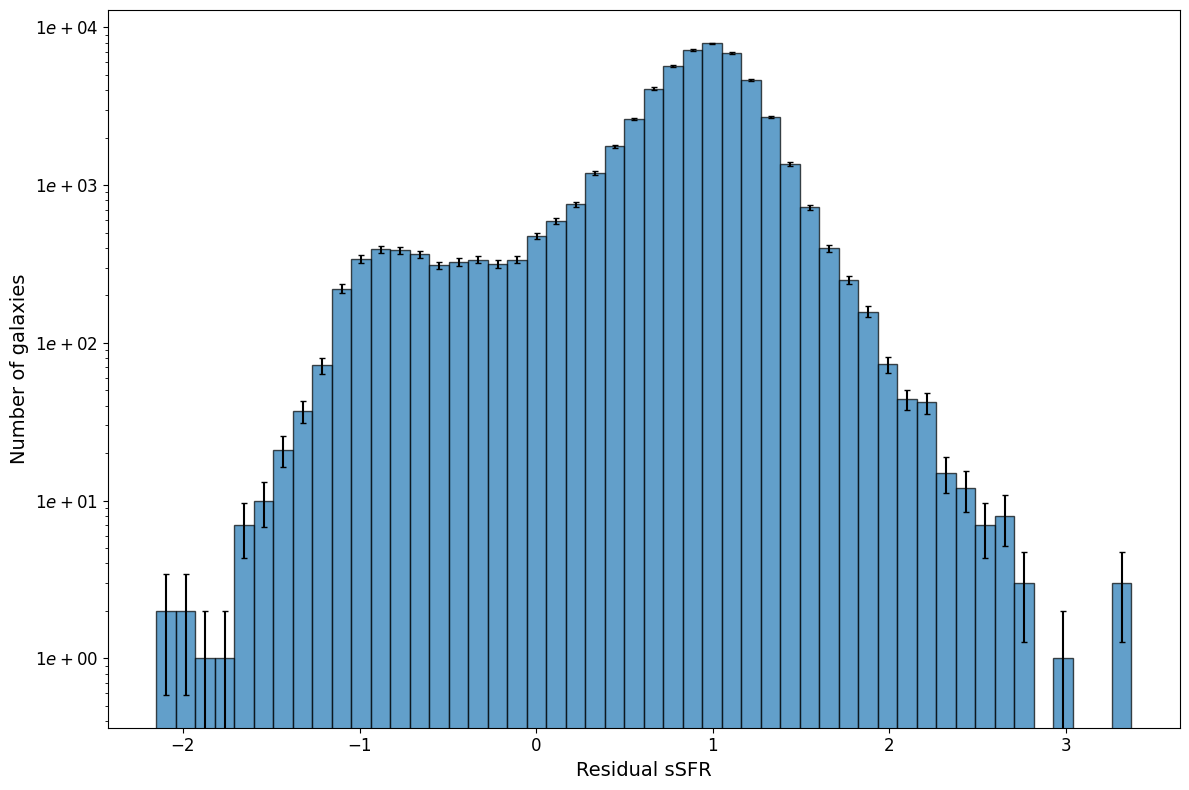

In [ ]:
plots.residual_distribution(non_quenched, f_interp)

In [ ]:
def classify_galaxy_status(row, f_interp):
    """
    Classify a galaxy based on its 'lgm_tot_p50' and 'specsfr_tot_p50'.
    
    Parameters
    ----------
    row : pandas.Series
        A row from a DataFrame that contains the fields 'lgm_tot_p50' and 'specsfr_tot_p50'.
    f_interp : function
        An interpolation function such that for a given mass, f_interp(mass)
        returns the limiting sSFR (i.e. the separation line between star-forming and passive galaxies).
    
    Returns
    -------
    str
        The classification of the galaxy, which is one of:
        - "quenched"  : if 'specsfr_tot_p50' equals -9999.0.
        - "star-forming" : if 'specsfr_tot_p50' is above the limiting sSFR.
        - "passive"   : otherwise.
    """
    if row['specsfr_tot_p50'] == -9999.0:
        return "quenched"
    else:
        limit = f_interp(row['lgm_tot_p50'])
        if row['specsfr_tot_p50'] > limit:
            return "star-forming"
        else:
            return "passive"

In [ ]:
df.apply(classify_galaxy_status, axis=1, f_interp=f_interp)

0        star-forming
1             passive
2        star-forming
3        star-forming
4            quenched
             ...     
79062    star-forming
79063    star-forming
79064         passive
79065         passive
79066    star-forming
Length: 79067, dtype: object

In [ ]:
df